<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/apr17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

import pandas as pd

import seaborn as sns

# T-SNE 
from sklearn.manifold import TSNE

Here, I use cancer dataset for tutorials.
It can be simply changed to another dataset

## Machine learning algorithms that we are going to use

- SVM

- Random Forest 

- Decision Tree 

- Softmax 

- KNN 

## Preprocess all data
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [3]:
iris = datasets.load_iris()
print("Features: \n", iris.feature_names)
print()
print("Labels: \n",   iris.target_names)

Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: 
 ['setosa' 'versicolor' 'virginica']


In [4]:
print("X data:", len(iris.feature_names))
print("Y data:", len(iris.target_names))

X data: 4
Y data: 3


## PCA section

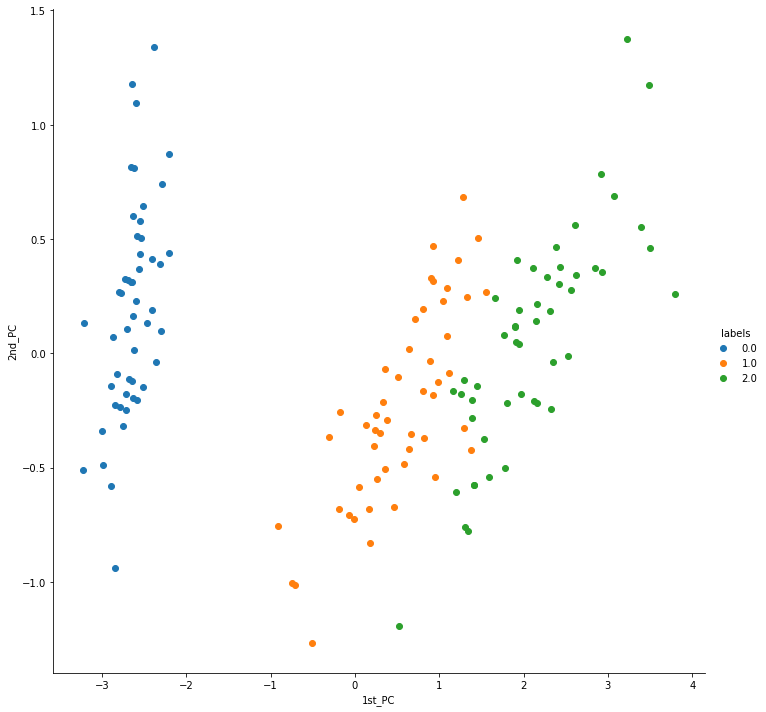

In [14]:
pca = PCA(n_components=2, random_state=1)
iris.data = pca.fit_transform(iris.data)
data_with_labels = np.vstack((iris.data.T, iris.target)).T
pca_df = pd.DataFrame(data=data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()

## T-SNE

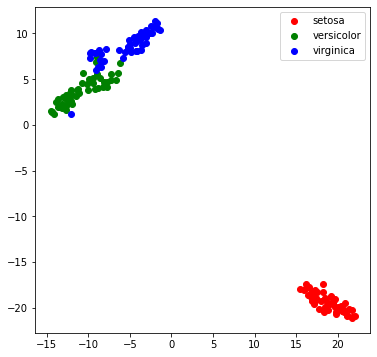

In [12]:
tsne = TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(iris.data)
target_ids = range(len(iris.target))

plt.figure(figsize=(6, 6))
colors = 'r', 'g', 'b'
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_2d[iris.target == i, 0], X_2d[iris.target == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [18]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Generate Train and Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Linear Regression

## SVM

In [15]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [16]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-5, 2, 8),
                        'C': np.logspace(-5, 2, 8),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [17]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s


KeyboardInterrupt: 

In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, svm_y_pred, average='micro'))

## Logistic Regression

In [ ]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-5, 2, 8),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4280 tasks      | elapsed:   24.3s


best hyper parameters {'C': 1.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 4797 out of 4800 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   28.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, log_y_pred, average='micro'))

Accuracy: 0.9777777777777777
F1 score: 0.9777777777777777


## KNN

In [ ]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=3)

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    1.8s


best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    3.4s finished


In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, knn_y_pred, average='micro'))

Accuracy: 0.9777777777777777
F1 score: 0.9777777777777777


## Random Forest

In [56]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(10, 500, 10)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(10, 200, 10)],
                            'min_samples_split' : [int(x) for x in np.linspace(10, 200, 10)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(10, 200, 10)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [57]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


best hyper parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished


In [58]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, rf_y_pred, average='micro'))

Accuracy: 0.9333333333333333
F1 score: 0.9333333333333333
